In [1]:
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
import seaborn as sns

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, train_test_split

In [2]:
#Import our csv data
df = pd.read_csv("CS540.csv", delimiter=",")
df[0:5]

,parid,aprtot,nbhd,price,total_area,months_since_sale,water_front,pool,runway_distance,track_distance
0,2765259,177811,5624,15000,2041,33,0,1,9.439564,337.538345
1,2765259,177811,5624,208900,2041,23,0,1,9.439564,337.538345
2,2767995,105600,5624,104000,1236,47,0,1,9.056473,338.117580
3,2768690,154974,5624,195000,2031,12,0,1,8.868702,338.141652
4,2772221,189097,5618,196000,2339,22,0,1,8.723448,337.274039


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46235 entries, 0 to 46234
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   parid              46235 non-null  int64  
 1   aprtot             46235 non-null  int64  
 2   nbhd               46235 non-null  int64  
 3   price              46235 non-null  int64  
 4   total_area         46235 non-null  int64  
 5   months_since_sale  46235 non-null  int64  
 6   water_front        46235 non-null  int64  
 7   pool               46235 non-null  int64  
 8   runway_distance    46235 non-null  float64
 9   track_distance     46235 non-null  float64
dtypes: float64(2), int64(8)
memory usage: 3.5 MB


In [4]:
#Convert our two categorical data to string
df=df.astype({'water_front':str,'pool':str})

In [5]:
#Independent Variables
X=df[['aprtot','total_area','pool','nbhd','months_since_sale','water_front','runway_distance','track_distance']]

In [6]:
#Dependent Variable
y=df["price"]

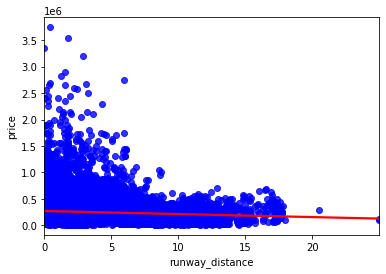

In [7]:
#Plotting runway distance against price
sns.regplot(x=df['runway_distance'],y=df['price'],data=df, scatter_kws={"color": "blue"}, line_kws={"color": "red"}, fit_reg=True)

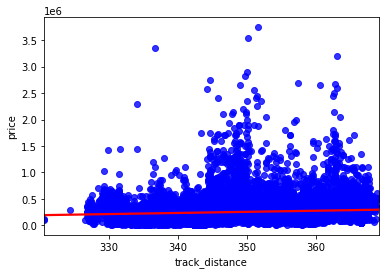

In [8]:
sns.regplot(x=df['track_distance'],y=df['price'],data=df, scatter_kws={"color": "blue"}, line_kws={"color": "red"}, fit_reg=True)

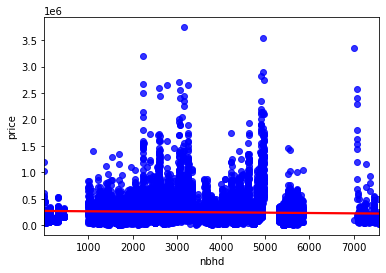

In [9]:
#Plotting nbhd against price
sns.regplot(x=df['nbhd'],y=df['price'],data=df, scatter_kws={"color": "blue"}, line_kws={"color": "red"}, fit_reg=True)

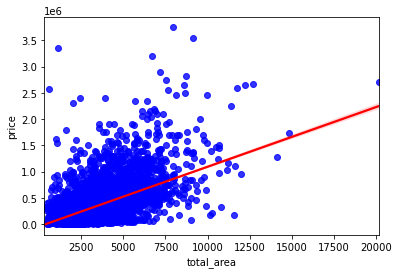

In [10]:
#Plotting total_area against price
sns.regplot(x=df['total_area'],y=df['price'],data=df, scatter_kws={"color": "blue"}, line_kws={"color": "red"}, fit_reg=True)

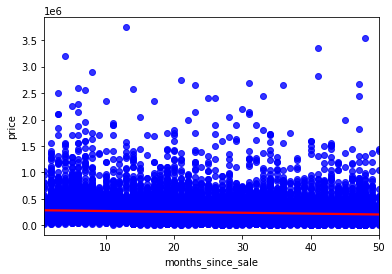

In [11]:
#Plotting months-since_sale against price
sns.regplot(x=df['months_since_sale'],y=df['price'],data=df, scatter_kws={"color": "blue"}, line_kws={"color": "red"}, fit_reg=True)

In [12]:
#removing outliers
q_hi = df['price'].quantile(0.999)
q_low = df['price'].quantile(0.001)
df = df[(df['price']>q_low) & (df['price']<q_hi)]

In [14]:
#Using statsmodels for multiple linear regression
x = sm.add_constant(X)
results = sm.OLS(y,x.astype(float)).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                 4.861e+04
Date:                Sun, 02 May 2021   Prob (F-statistic):               0.00
Time:                        17:36:05   Log-Likelihood:            -5.6956e+05
No. Observations:               46235   AIC:                         1.139e+06
Df Residuals:                   46227   BIC:                         1.139e+06
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -1.685e+04   5727.657     -2.941      0.003   -2.81e+04   -5620.208
aprtot                1.1285      0.003    375.996      0.000       1.123       1.134
total_area           -3.3023      0.408     -8.084      0.000      -4.103      -2.502
pool              -1.685e+04   5727.657     -2.941      0.003   -2.81e+04   -5620.208
nbhd                  0.0286      0.210      0.136      0.892      -0.384       0.441
months_since_sale -1520.0878     17.818    -85.313      0.000   -1555.011   -1485.165
water_front        3544.5646    685.505      5.171      0.000    2200.964    4888.165
runway_distance    -328.6074    106.003     -3.100      0.002    -536.374    -120.841
track_distance      233.0831     31.781      7.334      0.000     170.791     295.375
==============================================================================
Omnibus:                    38515.374   Durbin-Watson:                   1.893
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          9562821.734
Skew:                          -3.156   Prob(JB):                         0.00
Kurtosis:                      73.172   Cond. No.                     8.00e+20
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.58e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [15]:
#Using statsmodel for a polynomial regression with degrees=3
from sklearn.preprocessing import PolynomialFeatures
polynomial_features= PolynomialFeatures(degree=3)
xp = polynomial_features.fit_transform(x)
xp.shape

(46235, 220)

In [16]:
import statsmodels.api as sm

model = sm.OLS(y, xp).fit()
ypred = model.predict(xp) 

ypred.shape

(46235,)

In [17]:
#Slight improve in parameters such as R_squared
results = sm.OLS(y,xp.astype(float)).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     5634.
Date:                Sun, 02 May 2021   Prob (F-statistic):               0.00
Time:                        17:38:55   Log-Likelihood:            -5.6710e+05
No. Observations:               46235   AIC:                         1.134e+06
Df Residuals:                   46166   BIC:                         1.135e+06
Df Model:                          68                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0363      0.037      0.975      0.329      -0.037       0.109
x1             0.0036      0.003      1.112      0.266      -0.003       0.010
x2             0.0140      0.059      0.239      0.811      -0.101       0.129
x3            -0.0017      0.002     -1.065      0.287      -0.005       0.001
x4          3.576e-06   3.35e-06      1.067      0.286   -2.99e-06    1.01e-05
x5            -0.0050      0.005     -0.946      0.344      -0.015       0.005
x6             0.0002      0.000      1.294      0.196      -0.000       0.001
x7          8.654e-07    4.4e-06      0.197      0.844   -7.76e-06    9.49e-06
x8         -3.781e-05   2.37e-05     -1.595      0.111   -8.43e-05    8.65e-06
x9             0.0009      0.001      1.025      0.305      -0.001       0.003
x10         6.312e-07   6.26e-07      1.009      0.313   -5.95e-07    1.86e-06
x11            0.0141      0.059      0.239      0.811      -0.101       0.129
x12           -0.0017      0.002     -1.064      0.288      -0.005       0.001
x13         6.377e-07   6.37e-07      1.001      0.317   -6.11e-07    1.89e-06
x14           -0.0050      0.005     -0.946      0.344      -0.015       0.005
x15            0.0002      0.000      1.295      0.195      -0.000       0.001
x16         8.205e-07   4.32e-06      0.190      0.849   -7.65e-06    9.29e-06
x17        -3.749e-05   2.34e-05     -1.603      0.109   -8.33e-05    8.34e-06
x18            0.0009      0.001      1.025      0.305      -0.001       0.003
x19         3.368e-08   1.41e-07      0.238      0.811   -2.43e-07     3.1e-07
x20         -4.18e-05   4.05e-05     -1.033      0.302      -0.000    3.75e-05
x21            0.0141      0.059      0.239      0.811      -0.101       0.129
x22         5.293e-05   4.07e-05      1.301      0.193   -2.68e-05       0.000
x23           -0.0091      0.004     -2.286      0.022      -0.017      -0.001
x24            0.1187      0.032      3.766      0.000       0.057       0.180
x25            0.0471      0.009      5.264      0.000       0.030       0.065
x26            0.0002      0.001      0.218      0.827      -0.002       0.002
x27            0.0040      0.003      1.246      0.213      -0.002       0.010
x28           -0.0017      0.002     -1.064      0.288      -0.005       0.001
x29            0.0088      0.005      1.750      0.080      -0.001       0.019
x30            0.3715      0.392      0.949      0.343      -0.396       1.139
x31           -0.0002      0.006     -0.035      0.972      -0.011       0.011
x32            0.0012      0.004      0.303      0.762      -0.006       0.009
x33           -0.0109      0.067     -0.162      0.871      -0.143       0.121
x34         6.165e-07   6.18e-07      0.998      0.318   -5.94e-07    1.83e-06
x35           -0.0050      0.005     -0.946      0.344      -0.015       0.005
x3